In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import re

data_user=pd.read_csv(r'C:\Users\12595\Desktop\tianchi_mobile_recommend_train_user.csv') #读取csv格式数据

In [9]:
data_user.head(5)   

'''
item_id 商品id ;
behavior_type 用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）;
user_geohash 地理位置 ; 
item_category 商品种类 
'''

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [8]:
#①缺失值处理
#pandas模块

missingTotal=data_user.isnull().sum()   #统计每列缺失值的数目
missingExist=missingTotal[missingTotal>0]  #筛选缺失值大于0的列
missingExist=missingExist.sort_values(ascending=False)  #对他们进行排序（按照缺失值大小） ascending排列顺序 False：降序
print(missingExist)

user_geohash    8334824
dtype: int64


In [ ]:
#地理信息采集过程加密，这里不进行处理

In [4]:
#'time'列数据既包括年月日，也包括了小时数，因此在数据类型转化前，需要对'time'列数据拆分为'date'列和'hour'列
#re 模块
data_user['date']=data_user['time'].map(lambda s:re.compile(' ').split(s)[0])  #map(function, iterable, ...)
data_user['hour']=data_user['time'].map(lambda s:re.compile(' ').split(s)[1])
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
1505077,73462715,378485233,1,NaN,9130,2014-11-18 00,2014-11-18,00
8686537,36090137,236748115,1,NaN,10523,2014-11-18 00,2014-11-18,00
4035788,40459733,155218177,1,NaN,8561,2014-11-18 00,2014-11-18,00
10113411,814199,149808524,1,NaN,9053,2014-11-18 00,2014-11-18,00
2936757,113309982,5730861,1,NaN,3783,2014-11-18 00,2014-11-18,00


In [5]:
#查看data_user数据集数据类型：
data_user.dtypes

user_id           int64
item_id           int64
behavior_type     int64
user_geohash     object
item_category     int64
time             object
date             object
hour             object
dtype: object

In [6]:
#发现time列和date列应该转化为日期类数据类型，hour列应该是numpy的整数类型。

#数据类型转化

data_user['date']=pd.to_datetime(data_user['date'])
data_user['time']=pd.to_datetime(data_user['time'])
data_user['hour']=data_user['hour'].astype('int64')
data_user.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
user_geohash             object
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

In [9]:
data_user = data_user.sort_values(by='time',ascending=True) #按time升序排序
data_user = data_user.reset_index(drop=True)  #重新建立索引
data_user.describe()  #用于查看一些基本的统计详细信息

,user_id,item_id,behavior_type,item_category,hour
count,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07
mean,7.170732e+07,2.023084e+08,1.105271e+00,6.846162e+03,1.481799e+01
std,4.122920e+07,1.167397e+08,4.572662e-01,3.809922e+03,6.474778e+00
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00,0.000000e+00
25%,3.584965e+07,1.014130e+08,1.000000e+00,3.721000e+03,1.000000e+01
50%,7.292804e+07,2.021359e+08,1.000000e+00,6.209000e+03,1.600000e+01
75%,1.073774e+08,3.035405e+08,1.000000e+00,1.029000e+04,2.000000e+01
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04,2.300000e+01


<AxesSubplot:>

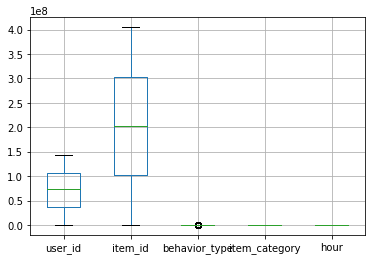

In [10]:
data_user.boxplot()  #箱型图

In [ ]:
#通过观察数据集的四分位数，总数，平均值，方差等，发现数据集并无异常值存在。

Text(0.5, 1.0, 'pv/uv_daily')

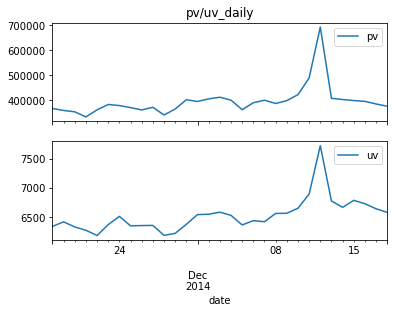

In [15]:
#日访问量分析——pv和uv分析
#PV(访问量)：即Page View, 具体是指网站的是页面浏览量或者点击量，页面被刷新一次就计算一次。
#UV(独立访客)：即Unique Visitor,访问您网站的一台电脑客户端为一个访客。

pv_daily=data_user.groupby('date')['user_id'].count().reset_index().rename(columns={'user_id':'pv'}) #每天分组，记录每天的user_id条数
uv_daily=data_user.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})#去重计数
fig,axes=plt.subplots(2,1,sharex=True)  #2行1列的画布，x轴相同
pv_daily.plot(x='date',y='pv',ax=axes[0])  
uv_daily.plot(x='date',y='uv',ax=axes[1])
axes[0].set_title('pv/uv_daily')   #设置pv的表头

In [ ]:
#结果显示如上图所示，在双十二期间，pv和uv访问量达到峰值，并且可以发现，uv和pv两个访问量数值差距比较大。
#因为数据集总人数大约是10000人左右，因此，通过uv值可以分析出双十二期间淘宝用户的日活跃大概是45%浮动。

Text(0.5, 1.0, 'uv_hour')

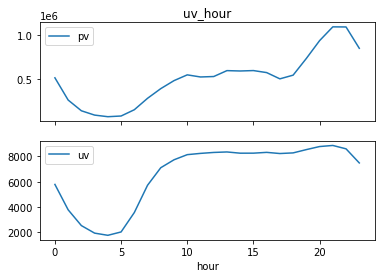

In [16]:
#小时访问量分析
#pv_hour记录每小时用户操作次数，uv_hour记录每小时不同的上线用户数量
pv_hour=data_user.groupby('hour')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_hour=data_user.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='pv',ax=axes[0])
uv_hour.plot(x='hour',y='uv',ax=axes[1])
axes[0].set_title('pv_hour')
axes[0].set_title('uv_hour')

In [ ]:
#凌晨0-5点期间波动情况相同，都呈下降趋势，访问量都比较小，同时在晚上18：00左右，pv波动情况比较剧烈，相比来看uv不太明显，因此晚上18：00以后是淘宝用户访问app的活跃时间段。

Text(0.5, 1.0, 'pv_different_behavior_type_except1')

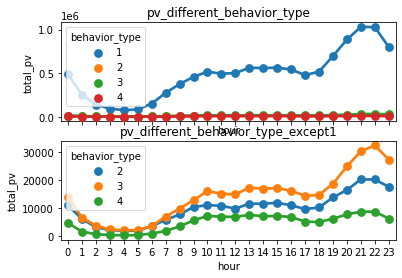

In [17]:
#不同行为类型用户分析
pv_detail=data_user.groupby(['behavior_type','hour'])['user_id'].count().reset_index().rename(columns={'user_id':'total_pv'})
fig,axes=plt.subplots(2,1,sharex=True)
#seabearn pointplot（点图）
sns.pointplot(x='hour',y='total_pv',hue='behavior_type',data=pv_detail,ax=axes[0])
sns.pointplot(x='hour',y='total_pv',hue='behavior_type',data=pv_detail[pv_detail.behavior_type!=1],ax=axes[1])#除了行为1（点击）的用户PV
axes[0].set_title('pv_different_behavior_type')
axes[1].set_title('pv_different_behavior_type_except1')

In [ ]:
#点击这一用户行为相比较于其他三类用户行为，pv访问量较高，同时四种用户行为的波动情况基本一致，因此晚上这一时间段不管哪一种用户行为，pv访问量都是最高的。从图2可以看出，加入购物车这一用户行为的pv总量高于收藏的总量，因此在后续漏斗流失分析中，用户类型3应该在2之前分析。

Text(0.5, 1.0, 'daily_user_buy')

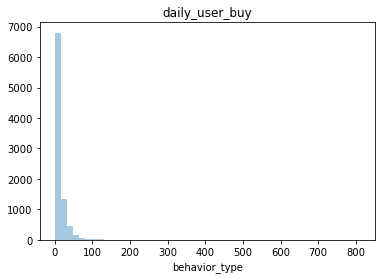

In [26]:
#用户支付次数情况分析
data_user_buy=data_user[data_user.behavior_type==4].groupby('user_id')['behavior_type'].count()
sns.distplot(data_user_buy,kde=False) #直方图   支付次数的分布情况
plt.title('daily_user_buy')

In [ ]:
#淘宝用户消费次数普遍在10次以内，因此需要重点关注购买次数在10次以上的消费者用户群体。

Text(0.5, 1.0, 'daily_ARPPU')

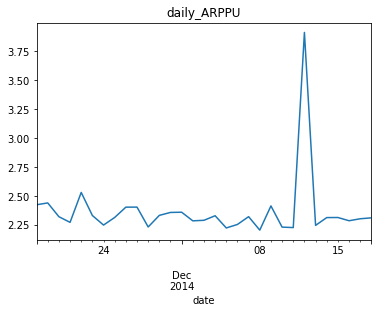

In [27]:
#日ARPPU
#ARPPU（average revenue per paying user）是指从每位付费用户身上获得的收入，它反映的是每个付费用户的平均付费额度。
#因为本数据集中没有消费金额，因此在计算过程中用支付次数代替消费金额

data_use_buy1=data_user[data_user.behavior_type==4].groupby(['date','user_id'])['behavior_type'].count().reset_index().rename(columns={'behavior_type':'total'})
data_use_buy1.groupby('date').apply(lambda x:x.total.sum()/x.total.count()).plot()  # 每天的支付次数（x.total）之和/支付次数的人数
plt.title('daily_ARPPU')

In [ ]:
#平均每天消费次数在2次左右波动，双十二期间消费次数达到最高值。

In [30]:
#日ARPU
#ARPU(Average Revenue Per User) ：平均每用户收入，可通过 总收入/AU 计算得出。它可以衡量产品的盈利能力和发展活力。
#消费次数替代金额

data_user['operation']=1  #新增一列 值都为1
data_use_buy2=data_user.groupby(['date','user_id','behavior_type'])['operation'].count().reset_index().rename(columns={'operation':'total'})
data_use_buy2.head(10)

,date,user_id,behavior_type,total
0,2014-11-18,4913,1,27
1,2014-11-18,4913,2,1
2,2014-11-18,7591,1,4
3,2014-11-18,12645,1,25
4,2014-11-18,54056,1,13
5,2014-11-18,54056,2,1
6,2014-11-18,54056,4,1
7,2014-11-18,79824,1,40
8,2014-11-18,79824,4,2
9,2014-11-18,88930,1,75


Text(0.5, 1.0, 'daily_ARPU')

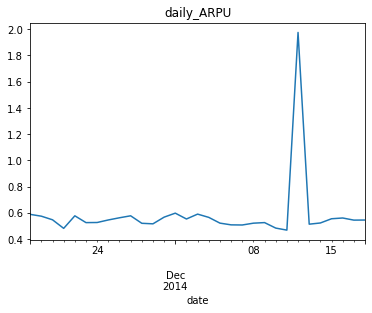

In [31]:
data_use_buy2.groupby('date').apply(lambda x:x[x.behavior_type==4].total.sum()/len(x.user_id.unique())).plot() #每天4支付的次数/所有用户数
plt.title('daily_ARPU')

In [ ]:
#淘宝活跃用户（有过操作行为的用户）平均每天消费次数比较低，在0.45次左右，双十二期间达到最高值，有2次左右。

Text(0.5, 1.0, 'daily_afford_rate')

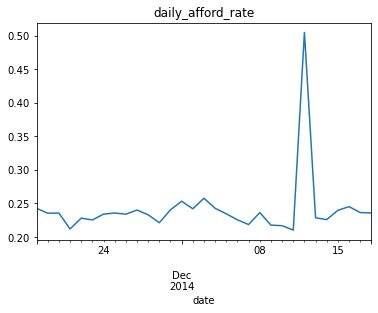

In [32]:
#付费率 付费率=消费人数/活跃用户人数（总人数）

data_use_buy2.groupby('date').apply(lambda x:x[x.behavior_type==4].total.count()/len(x.user_id.unique())).plot() #把刚刚的sum改为count
plt.title('daily_afford_rate')

In [ ]:
#每天活跃用户人群中，大概25%的用户具有消费行为，在双十二期间消费用户人数最多。

F:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


大多数用户消费：1次


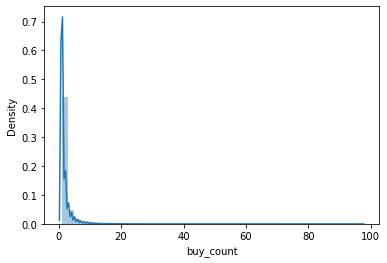

In [33]:
#同一时间段用户消费次数分布

data_user_buy3=data_user[data_user.behavior_type==4].groupby(['user_id','date','hour'])['operation'].sum().rename('buy_count')
sns.distplot(data_user_buy3)
print('大多数用户消费：{}次'.format(data_user_buy3.mode()[0])) #选择第一个众数进行填充（众数可能不止一个）

In [34]:
#复购情况分析

#即两天以上有购买行为,一天多次购买算一次  复购率=有复购行为的用户数/有购买行为的用户总数

date_rebuy=data_user[data_user.behavior_type==4].groupby('user_id')['date'].apply(lambda x:len(x.unique())).rename('rebuy_count')
print('复购率:',round(date_rebuy[date_rebuy>=2].count()/date_rebuy.count(),4))    #round 四舍五入

复购率: 0.8717


多数用户复购次数：0次


F:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


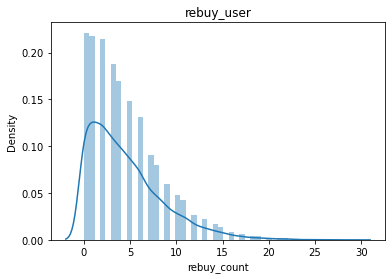

In [35]:
sns.distplot(date_rebuy-1)  #date_rebuy购买次数 -1表示复购次数
plt.title('rebuy_user')
print('多数用户复购次数：{}次'.format((date_rebuy-1).mode()[0]))  

Text(0, 0.5, 'gap_count')

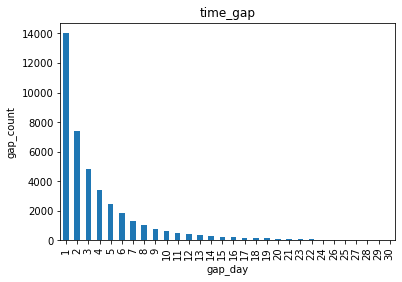

In [40]:
#所有复购时间间隔消费次数分布

data_day_buy=data_user[data_user.behavior_type==4].groupby(['user_id','date']).operation.count().reset_index()  #每个用户每天的支付次数
data_user_buy4=data_day_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna())  #diff date向下移动1次 由前减去后的差值  dropna 删除所有包含NaN的行
data_user_buy4=data_user_buy4.map(lambda x:x.days) 
data_user_buy4.value_counts().plot(kind='bar')  #value_counts 统计间隔次数出现的频率 bar柱状图
plt.title('time_gap')
plt.xlabel('gap_day')
plt.ylabel('gap_count')

In [ ]:
#消费次数随着消费时间间隔的增加而不断下降，在1-10天之内复购次数比较多，10天之后复购次数淘宝用户很少在进行复购

F:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date', ylabel='Density'>

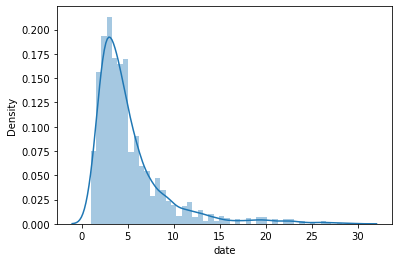

In [41]:
#不同用户平均复购时间分析
sns.distplot(data_user_buy4.reset_index().groupby('user_id').date.mean())

In [ ]:
#多数淘宝用户平均复购时间集中在1-5天时间间隔内。

In [50]:
#漏斗流失分析

data_user_count=data_user.groupby(['behavior_type']).count()# 分别计算点击、加入购物车、收藏、购买的用户数
data_user_count.head()

,user_id,item_id,user_geohash,item_category,time,date,hour,operation
behavior_type,,,,,,,,
1,11550581,11550581,3704666,11550581,11550581,11550581,11550581,11550581
2,242556,242556,74365,242556,242556,242556,242556,242556
3,343564,343564,104443,343564,343564,343564,343564,343564
4,120205,120205,38608,120205,120205,120205,120205,120205


In [51]:
pv_all=data_user['user_id'].count()#计算总用户数（即浏览量）
print(pv_all)

12256906


In [ ]:
#通过计算即可知晓 每个流程的用户转化率与流失率

In [53]:
#不同用户行为不同商品类别的转化率
data_category=data_user[data_user.behavior_type!=2].groupby(['item_category','behavior_type']).operation.count().unstack(1).rename(columns={1:'点击量',3:'加入购物车量',4:'购买量'}).fillna(0)#unstack 行旋转为列
data_category['转化率']=data_category['购买量']/data_category['点击量']  #点击到购买的转化率
data_category.head(10)

behavior_type,点击量,加入购物车量,购买量,转化率
item_category,,,,
2,3.0,0.0,0.0,0.000000
3,3.0,0.0,0.0,0.000000
4,1.0,0.0,0.0,0.000000
6,10.0,0.0,0.0,0.000000
8,976.0,4.0,4.0,0.004098
10,212.0,9.0,4.0,0.018868
11,8818.0,78.0,5.0,0.000567
12,194.0,14.0,5.0,0.025773
13,99.0,2.0,6.0,0.060606


F:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='转化率'>

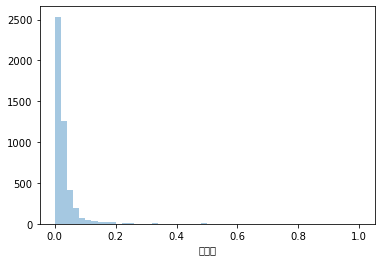

In [55]:
#异常值处理
data_category=data_category.fillna(0)
data_category=data_category[data_category['转化率']<=1]
#转化率绘图
sns.distplot(data_category[data_category['转化率']>0]['转化率'],kde=False)

In [ ]:
#不同商品类型的转化率大多在0.1左右，同时绝大多数用户都没有购买情况。

In [57]:
data_category['感兴趣比率']=data_category['加入购物车量']/data_category['点击量']
data_category.head(10)

behavior_type,点击量,加入购物车量,购买量,转化率,感兴趣比率
item_category,,,,,
2,3.0,0.0,0.0,0.000000,0.000000
3,3.0,0.0,0.0,0.000000,0.000000
4,1.0,0.0,0.0,0.000000,0.000000
6,10.0,0.0,0.0,0.000000,0.000000
8,976.0,4.0,4.0,0.004098,0.004098
10,212.0,9.0,4.0,0.018868,0.042453
11,8818.0,78.0,5.0,0.000567,0.008846
12,194.0,14.0,5.0,0.025773,0.072165
13,99.0,2.0,6.0,0.060606,0.020202


F:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='感兴趣比率'>

F:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24863 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36259 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24863 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\anaconda\lib\site-packages\

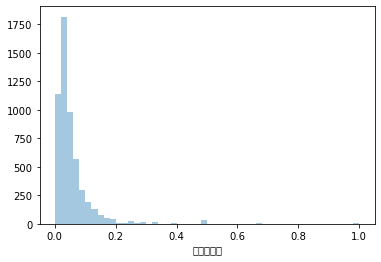

In [58]:
#异常值处理，感兴趣比率绘图
data_category=data_category[data_category['感兴趣比率']<=1]
sns.distplot(data_category[data_category['感兴趣比率']>0]['感兴趣比率'],kde=False)

In [ ]:
#感兴趣率和转化率类似，基本也是0.1以内，说明用户点击的绝大多数商品并非感兴趣，需要重视推荐系统的调整。

In [59]:
#将转化率分三类查看各类占比例
data_convert_rate=pd.cut(data_category['转化率'],[-1,0,0.1,1]).value_counts()
data_convert_rate=data_convert_rate/data_convert_rate.sum()
data_convert_rate

(0.0, 0.1]     0.502693
(-1.0, 0.0]    0.476885
(0.1, 1.0]     0.020422
Name: 转化率, dtype: float64

In [61]:
#将感兴趣比率分三类查看各类占比例
data_interest_rate=pd.cut(data_category['感兴趣比率'],[-1,0,0.1,1]).value_counts()
data_interest_rate=data_interest_rate/data_interest_rate.sum()
data_interest_rate

(0.0, 0.1]     0.538487
(-1.0, 0.0]    0.390373
(0.1, 1.0]     0.071140
Name: 感兴趣比率, dtype: float64

In [ ]:
#转化率达到0.1以上仅仅只有2%的用户，有超过47.7%的用户几乎不会发生购买行为。同时从感兴趣比率来看：有39%的用户对商品不感兴趣。

In [69]:
#二八理论和长尾理论
data_category=data_category[data_category['购买量']>0]
value_8=data_category['购买量'].sum()*0.8
value_10=data_category['购买量'].sum()
data_category=data_category.sort_values(by='购买量',ascending=False)  #倒序

In [70]:
data_category['累计购买量']=data_category['购买量'].cumsum()#cusum 从第一行开始累计
data_category['分类']=data_category['累计购买量'].map(lambda x:'前80%' if x<=value_8 else '后20%')
data_category.head()

behavior_type,点击量,加入购物车量,购买量,转化率,感兴趣比率,累计购买量,分类
item_category,,,,,,,
6344,85369.0,3822.0,2208.0,0.025864,0.044770,2208.0,前80%
1863,371738.0,9309.0,2000.0,0.005380,0.025042,4208.0,前80%
5232,135506.0,4486.0,1611.0,0.011889,0.033106,5819.0,前80%
6977,22806.0,2007.0,1324.0,0.058055,0.088003,7143.0,前80%
8877,63396.0,1974.0,1072.0,0.016910,0.031138,8215.0,前80%


In [71]:
data_category.groupby('分类')['分类'].count()/data_category['分类'].count()  #分别计算8、2占比

分类
前80%    0.155727
后20%    0.844273
Name: 分类, dtype: float64

In [ ]:
#前80%购买量有16%左右的商品品类承包，接近二八原则。

In [72]:
#用户价值度RFM模型分析
'''
R（Recency）：客户最近一次交易时间的间隔。R值越大，表示客户交易发生的日期越久，反之则表示客户交易发生的日期越近。
F（Frequency）：客户在最近一段时间内交易的次数。F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。
M（Monetary）：客户在最近一段时间内交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。
'''

from datetime import datetime

datenow=datetime(2014,12,20)

#每位用户最近购买时间
recent_buy_time=data_user[data_user.behavior_type==4].groupby('user_id').date.apply(lambda x:datetime(2014,12,20)-x.sort_values().iloc[-1]).reset_index().rename(columns={'date':'recent'})#升序排列的最后一行
recent_buy_time.recent=recent_buy_time.recent.map(lambda x:x.days)  #取days的数据

#每个用户消费频率（总消费次数）
buy_freq=data_user[data_user.behavior_type==4].groupby('user_id').date.count().reset_index().rename(columns={'date':'freq'})
rfm=pd.merge(recent_buy_time,buy_freq,left_on='user_id',right_on='user_id',how='outer')#两表拼接 left/right指定拼接主键 outer代表外连接

#将各维度分成两个程度,分数越高越好
rfm['recent_value']=pd.qcut(rfm.recent,2,labels=['2','1'])  #数据分箱 recent值的2分位数为界 1代表最近交易间隔久
rfm['freq_value']=pd.qcut(rfm.freq,2,labels=['1','2'])  #1代表近期交易频率低
rfm['rfm']=rfm['recent_value'].str.cat(rfm['freq_value']) #cat连接字符串
rfm.head()

,user_id,recent,freq,recent_value,freq_value,rfm
0,4913,4,6,2,1,21
1,6118,3,1,2,1,21
2,7528,7,6,1,1,11
3,7591,7,21,1,2,12
4,12645,6,8,2,1,21


In [ ]:
#因为本数据集没有提供消费金额，因此只能R和F进行用户价值分析。
#对于22用户，为重点用户需要关注；对于21这类忠诚度高而购买能力不足的，可以可以适当给点折扣或捆绑销售来增加用户的购买频率。对于12这类忠诚度不高而购买能力强的，需要关注他们的购物习性做精准化营销。